<a href="https://colab.research.google.com/github/PyBlin/Study/blob/main/pdVisualize/pdVisualize01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from : https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1.Basic plotting: plot

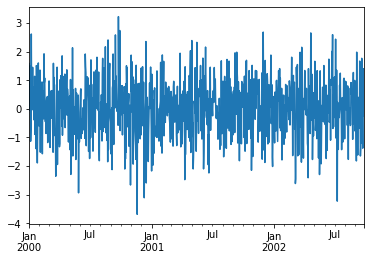

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', 
                                                          periods=1000))
ts
ts.plot();

* `pd.date_range('d/m/y', periods=1000)` 함수로 1000일 동안의 랜덤값을 구해봅니다.
* 너무 촘촘하여 가시성이 떨어집니다.

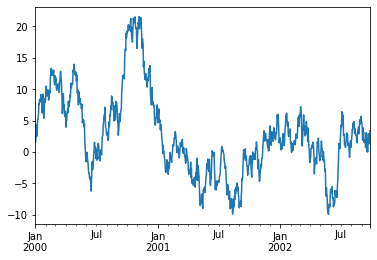

In [3]:
ts = ts.cumsum()
ts.plot();

* `.cumsum()` 함수로 각 원소의 누적 합을 표시해줍니다.
* 가시성이 좋아졌습니다.

In [4]:
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20',
               '2002-09-21', '2002-09-22', '2002-09-23', '2002-09-24',
               '2002-09-25', '2002-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, 
                  columns=list('ABCD'))
df = df.cumsum()
df.head()

,A,B,C,D
2000-01-01,0.499348,0.017530,-0.011797,-1.086042
2000-01-02,0.487876,-0.148507,0.979487,-0.922028
2000-01-03,0.638315,0.948319,0.249544,-0.268163
2000-01-04,1.701716,-0.387336,-0.868828,1.251015
2000-01-05,4.360714,-0.844077,-1.323012,1.302488


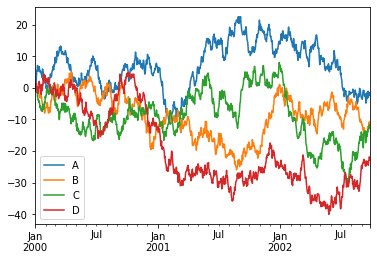

In [6]:
df.plot();

* 데이터프레임에서는 모든 라벨을 볼 수 있어 편리합니다.

# 2.Other plots

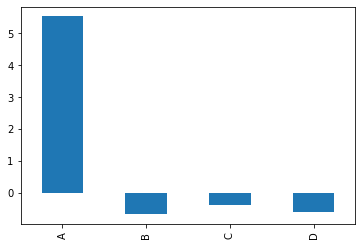

In [7]:
df.iloc[5].plot(kind='bar');

## 2.1 Bar plots

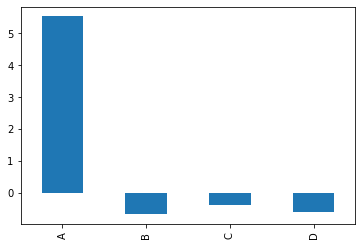

In [8]:
df.iloc[5].plot.bar();

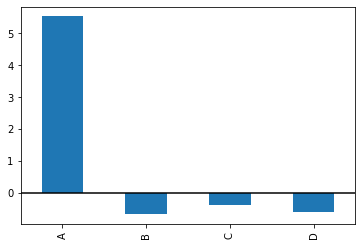

In [9]:
df.iloc[5].plot.bar()
plt.axhline(0, color='k');

* `plt.axhline(0, color=)` 함수로 y축 0에서 수평으로 그어진 직선을 그려줍니다.

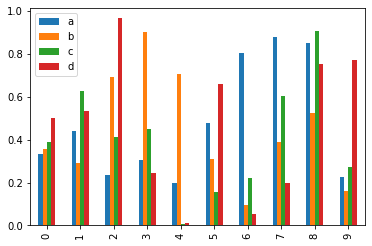

In [10]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a','b','c','d'])
df2.plot.bar();

* 데이터프레임에서는 그래프를 여러 개 그릴 수 있습니다.

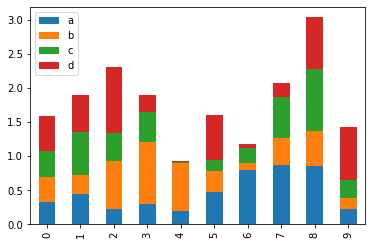

In [11]:
df2.plot.bar(stacked=True);

* `df.plot.bar(stacked=True)` : 스택 그래프를 사용할 수 있습니다.

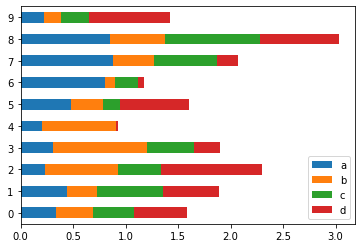

In [12]:
df2.plot.barh(stacked=True);

* barh : 수평 막대그래프로 보여줍니다.

## 2.2 Histogram

* 데이터프레임과 시리즈 둘 다 가능합니다.

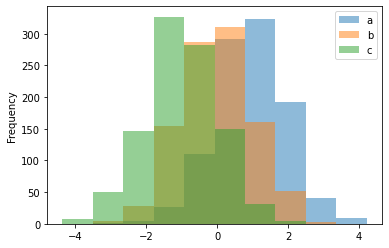

In [13]:
df3 = pd.DataFrame({'a':np.random.randn(1000)+1, 
                    'b':np.random.randn(1000), 
                    'c':np.random.randn(1000)-1}, columns=['a','b','c'])
df3.plot.hist(alpha=0.5);

* `alpha` : 투명도를 결정해줍니다.

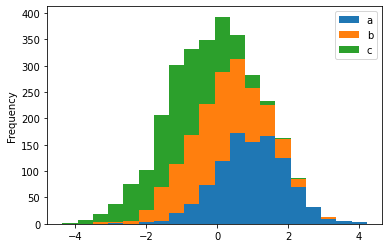

In [14]:
df3.plot.hist(stacked=True, bins=20);

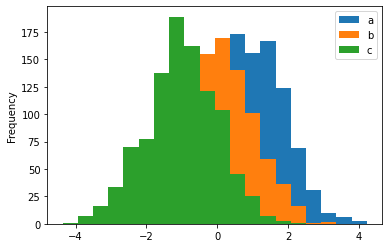

In [15]:
df3.plot.hist(stacked=False, bins=20);

* `stacked` : 체적 여부를 결정합니다.
* `bins` : Bin 크기를 설정합니다. (그래프의 굵기...?)

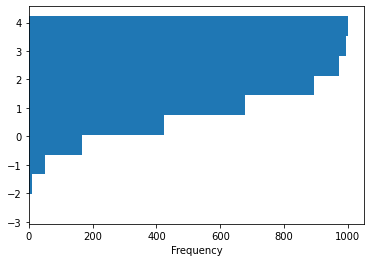

In [16]:
df3['a'].plot.hist(orientation='horizontal', cumulative=True);

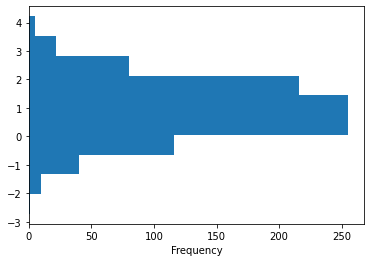

In [17]:
df3['a'].plot.hist(orientation='horizontal', cumulative=False);

* `orientation` : 'horizontal'을 사용하여 수평 Histogram을 볼 수 있습니다.
* `cumulative` : 누적 여부를 결정합니다.

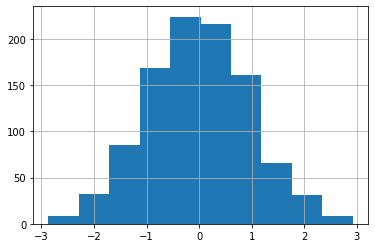

In [18]:
df['A'].diff().hist();

* `.diff()` : 차분을 보여줍니다. (NaN, a2-a1, a3-a2, ... an-a(n-1))

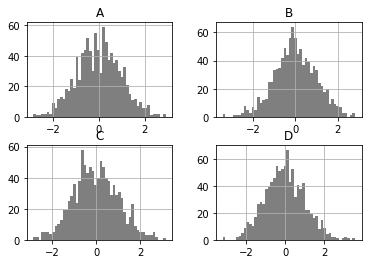

In [19]:
df.diff().hist(color='k', alpha=0.5, bins=50);

* `df.hist()` : 여러 column의 histogram을 subplot으로 그릴 수 있습니다.

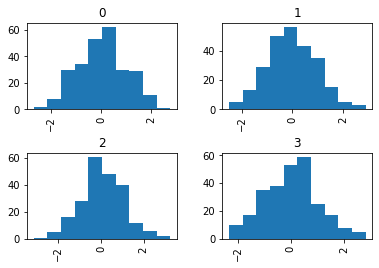

In [20]:
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0,4,1000), figsize=(6,4));

* `by` : 히스토그램을 그룹으로 묶을 수 있습니다.
* `figsize=(width, height)` : 그래프의 크기를 결정합니다.

## 2.3 Box plots

* Boxplot 은 각 컬럼의 분포를 시각화할 때 사용합니다.

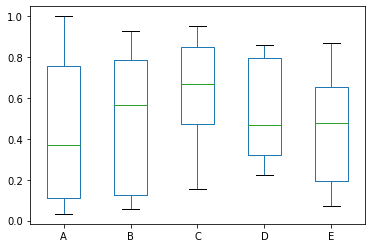

In [21]:
df = pd.DataFrame(np.random.rand(10,5), columns=['A','B','C','D','E'])
df.plot.box();

* 10x5 랜덤 행렬을 만들어서 boxplot 으로 표현한 그래프입니다.

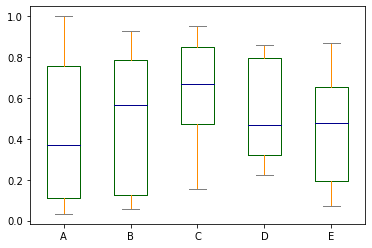

In [22]:
color = {'boxes':'DarkGreen', 'whiskers':'DarkOrange', 'medians':'DarkBlue', 
         'caps':'Gray'}
df.plot.box(color=color, sym='r+')

* `color` : 색상을 지정할 수 있습니다.
* `sym='r+'` : 이상치를 표시해줍니다. (+, p, ^, s...)

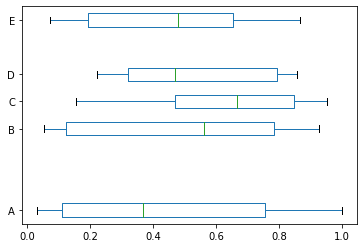

In [23]:
df.plot.box(vert=False, positions=[1,4,5,6,8]);

* `vert=False` : boxplot 을 수평으로 표현합니다.
* `positions=[]` : 그래프의 위치를 설정합니다.

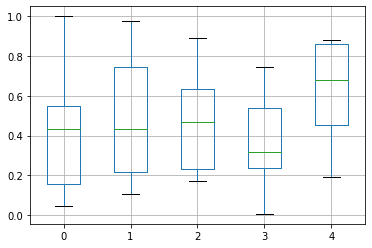

In [24]:
df = pd.DataFrame(np.random.rand(10,5))
df.boxplot();

* pandas 와 matplotlib 의 메서드는 비슷합니다.
* `.boxplot()`
* `.plot.box()`

In [25]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df

,Col1,Col2,X
0,0.412588,0.849499,A
1,0.756923,0.855632,A
2,0.489575,0.928794,A
3,0.480962,0.998536,A
4,0.293389,0.849917,A
5,0.699891,0.912472,B
6,0.702548,0.777652,B
7,0.152715,0.174364,B
8,0.034088,0.085252,B
9,0.639718,0.153984,B


* X 컬럼을 이용하여 A그룹과 B그룹으로 나누어줍니다.

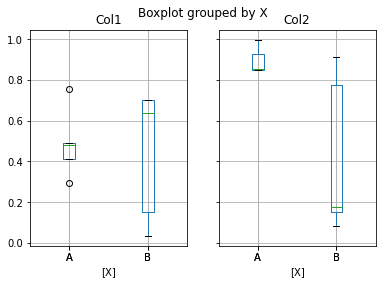

In [26]:
df.boxplot(by='X');

* `by='column name'` : 그룹화된 boxplot 을 보여줍니다.

In [27]:
df = pd.DataFrame(np.random.rand(10,3), columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])
df

,Col1,Col2,Col3,X,Y
0,0.827639,0.640738,0.041107,A,A
1,0.101593,0.637096,0.406742,A,B
2,0.586366,0.599129,0.471678,A,A
3,0.697974,0.965238,0.845797,A,B
4,0.256996,0.825364,0.518099,A,A
5,0.511001,0.368282,0.497123,B,B
6,0.604130,0.116121,0.728801,B,A
7,0.107167,0.400826,0.031779,B,B
8,0.851947,0.575081,0.463083,B,A
9,0.905433,0.245215,0.410694,B,B


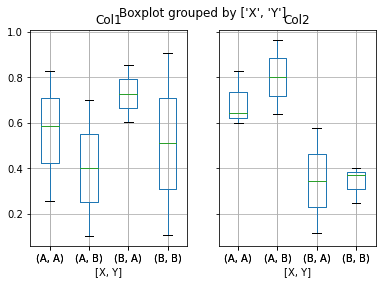

In [28]:
df.boxplot(column=['Col1', 'Col2'], by=['X', 'Y']);

* 컬럼을 여러 개 지정해서 subplot 으로 표현할 수 있습니다.
* 여러 개의 컬럼으로 그룹을 지정할 수 있습니다.

In [29]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50,2))
df_box['g'] = np.random.choice(['A','B'], size=50)
df_box.loc[df_box['g']=='B', 1] += 3
df_box.tail()

,0,1,g
45,0.079842,2.600035,B
46,-1.027851,2.415282,B
47,0.816594,2.918053,B
48,-0.344766,0.528288,A
49,-1.068989,-0.511881,A


* 50x2 행렬을 만들고 g 컬럼을 추가하여 A와 B를 랜덤으로 부여합니다.
* 1 컬럼에서 B그룹일 경우에 값을 추가해줍니다.

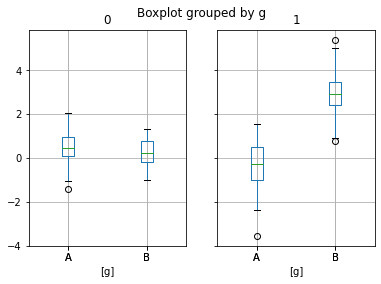

In [30]:
df_box.boxplot(by='g');

* 1 컬럼의 B 그래프만 값이 상승한 것을 확인할 수 있습니다.

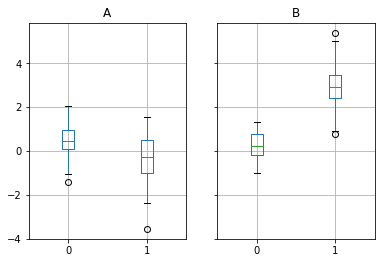

In [31]:
df_box.groupby('g').boxplot();

* `.groupby('column name').boxplot()` : 앞의 그래프와 동일한 그래프를 보여줍니다.

## 2.4 Area plot

* Area plot 은 기본적으로 누적되는 그래프입니다. 따라서 모든 컬럼의 값들은 양수 아니면 음수로 일치해야합니다.
* NaN 값은 자동으로 0으로 대체됩니다.
* 만약 NaN 값을 없애거나 다른 값으로 대체하고 싶다면, plot을 호출하기 전에 다음 함수를 사용해야 합니다.
* `df.dropna()` or `df.fillna()`

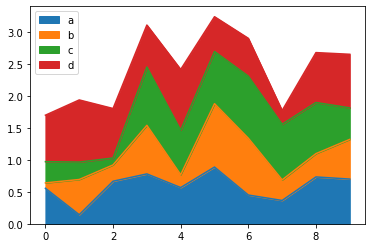

In [32]:
df = pd.DataFrame(np.random.rand(10,4), columns=['a','b','c','d'])
df.plot.area();

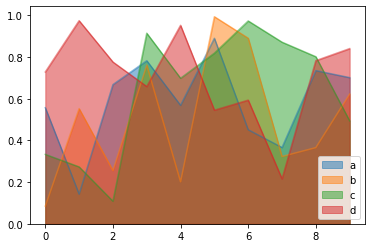

In [33]:
df.plot.area(stacked=False);

* 누적 그래프를 사용하고 싶다면, `stacked=False` 를 사용하십시오.
* `alpha=0.5` : default 값입니다.

## 2.5 Scatter plot

* 산점도는 x축, y축 컬럼이 필요합니다.

In [34]:
df = pd.DataFrame(np.random.rand(50,4), columns=['a','b','c','d'])
df['species'] = pd.Categorical(['setosa']*20 + 
                               ['versicolor']*20 + 
                               ['virginica']*10)
df.tail()

,a,b,c,d,species
45,0.036603,0.868149,0.672828,0.087472,virginica
46,0.886966,0.782465,0.317304,0.818314,virginica
47,0.507555,0.021193,0.433522,0.446313,virginica
48,0.238820,0.830246,0.744764,0.586479,virginica
49,0.492868,0.487356,0.266741,0.605011,virginica


* 50x4 데이터프레임에 species 컬럼을 추가합니다.
* setosa 20개, versicolor 20개, virginica 10개로 지정합니다.

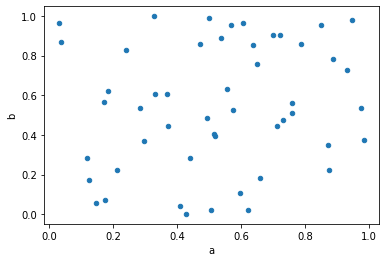

In [35]:
df.plot.scatter('a', 'b');

* `.plot.scatter(x='a', y='b')` : x축을 a로, y축을 b로 설정하여 산점도를 그립니다.

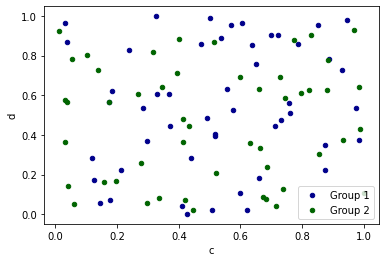

In [36]:
ax = df.plot.scatter('a', 'b', c='DarkBlue', label='Group 1')
df.plot.scatter('c', 'd', c='DarkGreen', label='Group 2', ax=ax);

* 하나의 그래프에 여러 그룹을 표현할 수 있습니다.
* ax 에 a-b 산점도를 할당합니다.
* `ax=ax` : 함께 표현할 그룹을 지정합니다. (a-b 산점도)

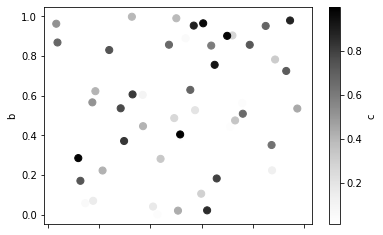

In [37]:
df.plot.scatter('a', 'b', c='c', s=50);

* `color='column name'` : 각 점에 해당하는 column name 의 값을 보여줍니다.
* `size=50` : 점들의 크기를 설정합니다.

In [38]:
# df.plot.scatter('a', 'b', c='species', cmap='viridis', s=50);

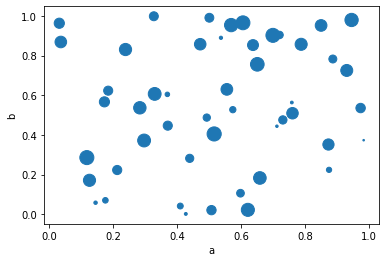

In [39]:
df.plot.scatter('a', 'b', s=df['c']*200);

* bubble size 에 따른 bubble chart 를 보여줍니다.

## 2.6 Hexagonal bin plot

* Hexabin plot 은 산점도로 표현하기에 너무 밀집되어 불편할 때 유용하게 사용됩니다.

In [40]:
df = pd.DataFrame(np.random.randn(1000,2), columns=['a','b'])
df['b'] = df['b'] + np.arange(1000)
df.tail()

,a,b
995,0.453292,995.923086
996,0.203419,997.580013
997,0.661820,999.104198
998,-0.249234,998.119525
999,1.510425,998.725736


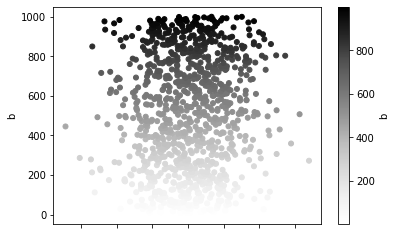

In [41]:
df.plot.scatter('a', 'b', c='b', s=25);

* 값이 너무 많아 산점도로 표현하기에는 불편해 보입니다.

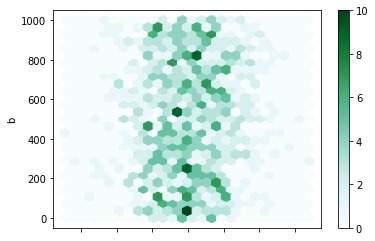

In [42]:
df.plot.hexbin('a', 'b', gridsize=25);

* `gridsize` : 값이 클 수록 더 작고 더 많은 bin 이 표현됩니다.


In [43]:
df['z'] = np.random.uniform(0,3,1000)
df.tail()

,a,b,z
995,0.453292,995.923086,0.252390
996,0.203419,997.580013,2.163516
997,0.661820,999.104198,1.831460
998,-0.249234,998.119525,0.416919
999,1.510425,998.725736,1.307740


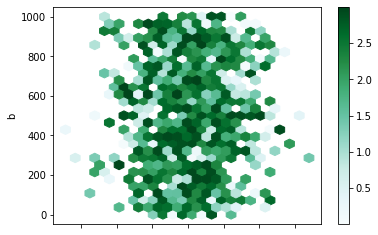

In [44]:
df.plot.hexbin('a', 'b', C='z', reduce_C_function=np.max, gridsize=25);

* `C` : ???
* `reduce_C_function` : ???

## 2.7 Pie plot

* area plot 과 마찬가지로 Nan 값은 자동으로 0으로 대체됩니다.
* 음수가 있으면 ValueError 가 발생합니다.

In [45]:
s = pd.Series(3*np.random.rand(4), index=['a','b','c','d'], name='Series')
s

a    2.014434
b    1.506723
c    1.391430
d    2.553797
Name: Series, dtype: float64

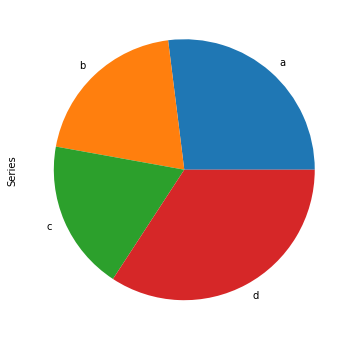

In [46]:
s.plot.pie(figsize=(6,6));

In [47]:
df = pd.DataFrame(3*np.random.rand(4,2), index=['a','b','c','d'], 
                  columns=['x','y'])
df

,x,y
a,2.787440,0.385701
b,0.311736,1.116116
c,0.058000,2.846645
d,1.611144,1.761811


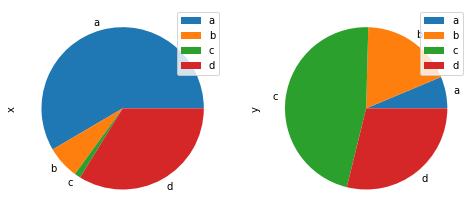

In [48]:
df.plot.pie(subplots=True, figsize=(8,4));

* `subplots=True` : 데이터프레임의 모든 컬럼을 그려줍니다.
* `legend=True` : default 값으로 legend 를 보여줍니다. 숨기려면 False 로 바꿔줍니다.

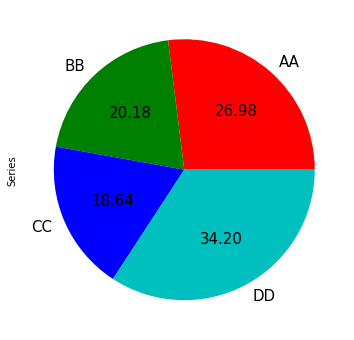

In [49]:
s.plot.pie(labels=['AA','BB','CC','DD'], colors=['r','g','b','c'], 
           autopct='%.2f', fontsize=15, figsize=(6,6));

* `labels` : 각 파이차트 부분의 이름을 지정합니다.
* `colors` : 각 파이차트 부분의 색상을 지정합니다.
* `autopct` : 표현할 소숫점 자릿수를 설정합니다.
* `fontsize` : 텍스트 크기를 설정합니다.

In [50]:
s = pd.Series([0.1]*4, index=['a','b','c','d'], name='Series 2')
s

a    0.1
b    0.1
c    0.1
d    0.1
Name: Series 2, dtype: float64

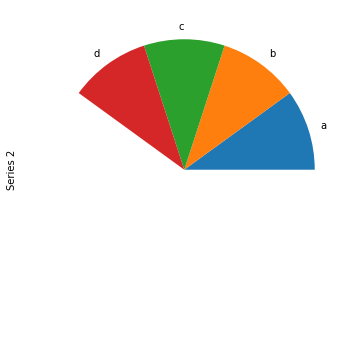

In [51]:
s.plot.pie(figsize=(6,6));

* 만약 총 합이 1 미만이라면, 부채꼴 형태로 그려집니다.